# One vs All

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import scipy.optimize
import functools
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and visualizing training data

The training data is 5000 digit images of digits of size 20x20. We will display a random selection of 25 of them.

In [2]:
ex3data1 = scipy.io.loadmat("./ex3data1.mat")
X = ex3data1['X']
y = ex3data1['y'][:,0]
y[y==10] = 0

In [3]:
m, n = X.shape
m, n

(5000, 400)

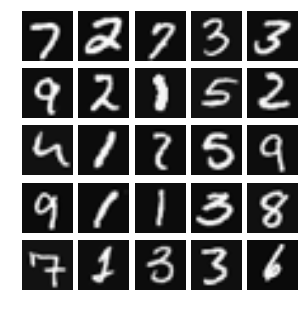

In [4]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

import random

display_rows, display_cols = (5, 5)

for i in range(display_rows * display_cols):
    ax = fig.add_subplot(display_rows, display_cols, i+1)
    ax.set_axis_off()
    image = X[random.randint(0, m-1)].reshape(20, 20).T
    image /= np.max(image)
    ax.imshow(image, cmap=plt.cm.Greys_r)

In [ ]:
X = np.insert(X, 0, np.ones(m), 1)

## Part 2: Vectorize Logistic Regression
In this part of the exercise, we will reuse your logistic regression.Task here is to make sure that our
regularized logistic regression implementation is vectorized. After
that, we will implement one-vs-all classification for the handwritten
digit dataset.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def h(theta, x):
    return sigmoid(x.dot(theta))

#LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
#regularization
#   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
#   theta as the parameter for regularized logistic regression and the
#   gradient of the cost w.r.t. to the parameters. 

def cost(X, y, theta, lambda_=None):
    # You need to return the following variables correctly 
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Hint: The computation of the cost function and gradients can be
    #       efficiently vectorized. For example, consider the computation
    #
    #           sigmoid(X * theta)
    #
    #       Each row of the resulting matrix will contain the value of the
    #       prediction for that example. You can make use of this to vectorize
    #       the cost function and gradient computations. 
    #

    
    
    # =============================================================
    
    return J

def gradient(X, y, theta, lambda_=None):
    # You need to return the following variables correctly     
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    # Hint: When computing the gradient of the regularized cost function, 
    #       there're many possible vectorized solutions, but one solution
    #       looks like:
    #           grad = (unregularized gradient for logistic regression)
    #           temp = theta; 
    #           temp[0] = 0;   # because we don't add anything for j = 0  
    #           grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    
    
    # =============================================================
    
    return grad

In [ ]:
initial_theta = np.zeros(n + 1)
lambda_ = 0.1
cost(X, y, initial_theta, lambda_)

In [ ]:
gradient(X, y, initial_theta, lambda_).shape

In [ ]:
def one_vs_all(X, y, num_labels, lambda_):
    #ONEVSALL trains multiple logistic regression classifiers and returns all
    #the classifiers in a matrix all_theta, where the i-th row of all_theta 
    #corresponds to the classifier for label i
    #   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
    #   logisitc regression classifiers and returns each of these classifiers
    #   in a list all_theta, where the i-th item of all_theta corresponds 
    #   to the classifier for label i
    
    # You need to return the following variables correctly 
    all_theta = [None] * num_labels
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the following code to train num_labels
    #               logistic regression classifiers with regularization
    #               parameter lambda. 
    #
    # Hint: You can use y == c to obtain a vector of True's and False's
    #
    # Note: For this assignment, we recommend using scipy.optimize.minimize with method='L-BFGS-B'
    #       to optimize the cost function.
    #       It is okay to use a for-loop (for i in range(num_labels)) to
    #       loop over the different classes.
    #
    # Example Code for scipy.optimize.minimize:
    #
    #     result = scipy.optimize.minimize(lambda t: cost(X, y==digit, t, lambda_),
    #                                  initial_theta,
    #                                  jac=lambda t: gradient(X, y==digit, t, lambda_),
    #                                  method='L-BFGS-B')
    #     theta = result.x
    
    
    
    
    
    # =========================================================================

In [ ]:
num_labels = 10
thetas = one_vs_all(X, y, num_labels, lambda_)

In [ ]:
fig = plt.figure(figsize=(10,10))
for d in range(10):
    ax = fig.add_subplot(5, 2, d+1)
    ax.scatter(range(m), h(thetas[d], X), s=1)

In [ ]:
def predict_one_vs_all(X, thetas):
    #PREDICT Predict the label for a trained one-vs-all classifier. The labels 
    #are in the range 1..K, where K = len(thetas)
    #  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
    #  for each example in the matrix X. Note that X contains the examples in
    #  rows. all_theta is a list where the i-th entry is a trained logistic
    #  regression theta vector for the i-th class. You should set p to a vector
    #  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
    #  for 4 examples) 
    
    
    # You need to return the following variables correctly 
    p = np.zeros(X.shape[0]);
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters (one-vs-all).
    #               You should set p to a vector of predictions (from 1 to
    #               num_labels).
    #
    # Hint: This code can be done all vectorized using the max function.
    #       In particular, the max function can also return the index of the 
    #       max element, for more information see 'help max'. If your examples 
    #       are in rows, then, you can use max(A, [], 2) to obtain the max 
    #       for each row.
    #       


    
    
    
    
    
    
    # =========================================================================
                       
    return p

In [ ]:
predictions = predict_one_vs_all(X, thetas)

plt.scatter(range(m), predictions, s=1)

Training set accuracy:

In [ ]:
(predictions == y).mean()